# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [101]:
# initial imports
import os
import pandas as pd
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv

%matplotlib inline

In [102]:
import hvplot.pandas

In [103]:
import matplotlib.pyplot as plt

In [104]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [105]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [106]:
# Calculate the mean number of housing units per year (hint: use groupby) 
# YOUR CODE HERE!

housing_units_by_year = sfo_data['housing_units'].groupby('year').mean()
huby_std = housing_units_by_year.std()
huby_min = housing_units_by_year.min()-huby_std
huby_max = housing_units_by_year.max()+huby_std


In [107]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# This gives requested output - updated to hvplot.bar for dashboard
#fig_housing_units = plt.figure()
#housing_units_by_year_plot = housing_units_by_year.plot(title="Housing Units in San Francisco from 2010 to 2016", kind='bar', x='year', y='housing_units', ylim=(huby_min,huby_max))
#housing_units_by_year_plot.set_ylabel("Housing Units")
#housing_units_by_year_plot.set_xlabel("Year")
#plt.show()
#plt.close(fig_housing_units)

fig_housing_units = housing_units_by_year.hvplot.bar(title="Housing Units in San Francisco from 2010 to 2016",
                                                    x='year',
                                                    xlabel="Year",
                                                    y='housing_units',
                                                    ylim=(huby_min,huby_max),
                                                    ylabel="Housing Units",
                                                    yformatter='%2f',
                                                    rot=45)

fhu = pn.panel(fig_housing_units)
fhu

HoloViews(Bars)

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [108]:
# Calculate the average gross rent and average sale price per square foot

average_rent_sales = sfo_data.drop(columns=['housing_units']).groupby('year').mean()
#average_rent_sales

In [109]:
# Plot the Average Gross Rent per Year as a Line Chart 

#fig_avg_gross_rent = plt.figure()
#avg_gross_rent_by_year = average_rent_sales.plot(title="Average Gross Rent in San Francisco", kind='line', y='gross_rent', legend=None)
#avg_gross_rent_by_year.set_ylabel("Gross Rent")
#avg_gross_rent_by_year.set_xlabel("Year")
#plt.show()
#plt.close(fig_avg_gross_rent)

fig_avg_gross_rent = average_rent_sales.hvplot.line(title="Average Gross Rent in San Francisco",
                                                    xlabel="Year",
                                                    y='gross_rent',
                                                    ylabel="Gross Rent")
average_gross_rent_by_year = pn.panel(fig_avg_gross_rent)
average_gross_rent_by_year


HoloViews(Curve)

### Average Sales Price per Year

In [110]:
# Plot the Average Sales Price per Year as a line chart
# YOUR CODE HERE!
#fig_avg_sales = plt.figure()
#avg_sales_by_year = average_rent_sales.plot(title="Average Sale Price per Squre Foot in San Francisco", kind='line', y='sale_price_sqr_foot', legend=None)
#avg_sales_by_year.set_ylabel("Avg. Sale Price")
#avg_sales_by_year.set_xlabel("Year")
#plt.show()
#plt.close(fig_avg_sales)

fig_avg_sales = average_rent_sales.hvplot.line(title="Average Sale Price per Square Foot in San Francisco",
                                                    xlabel="Year",
                                                    y='sale_price_sqr_foot',
                                                    ylabel="Avg. Sale Price")
fas = pn.panel(fig_avg_sales)
fas



HoloViews(Curve)

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [111]:
# Group by year and neighborhood and then create a new dataframe of the mean values

avg_by_year_neighborhood = sfo_data.groupby(['year','neighborhood']).mean().reset_index()
abyn_df = pd.DataFrame(data=avg_by_year_neighborhood, columns=('year','neighborhood','sale_price_sqr_foot'))
# line graph neighborhood wasn't capitalized, updated column names and saved dataframe
abyn_df.rename(columns={'year':'Year',
                       'neighborhood':'Neighborhood'}, inplace=True)


In [112]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
abyn_fig = abyn_df.hvplot.line(
    y='sale_price_sqr_foot', 
    x='Year', 
    groupby='Neighborhood', 
    ylabel='Sale Price Per Sqft', 
    xlabel='Year',
    widget_location='left_top'
    )
abyn = pn.panel(abyn_fig)
abyn

Row
    [0] Column
        [0] WidgetBox
            [0] Select(margin=(20, 20, 20, 20), name='Neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
        [1] VSpacer()
    [1] HoloViews(DynamicMap, widget_location='left_top')

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [113]:
# Getting the data from the top 10 expensive neighborhoods
#sfo_data.head()
avg_sale_per_neighborhood = sfo_data.groupby(['neighborhood']).mean()
avg_sale_per_neighborhood.sort_values('sale_price_sqr_foot', ascending=False, inplace=True)

aspn_df = pd.DataFrame(data=avg_sale_per_neighborhood.iloc[0:10].reset_index())
aspn_std = aspn_df['sale_price_sqr_foot'].std()
aspn_min = aspn_df['sale_price_sqr_foot'].min()-aspn_std
aspn_max = aspn_df['sale_price_sqr_foot'].max()+aspn_std


In [114]:
# Plotting the data from the top 10 expensive neighborhoods

top_ten_expensive_fig = aspn_df.hvplot.bar(y='sale_price_sqr_foot',
                   x='neighborhood',
                   ylim=(aspn_min,aspn_max),
                   ylabel='Sale Price Per Sqft',
                   xlabel='Neighborhood',
                   rot=45
                  )
ttef = pn.panel(top_ten_expensive_fig)
ttef

HoloViews(Bars)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

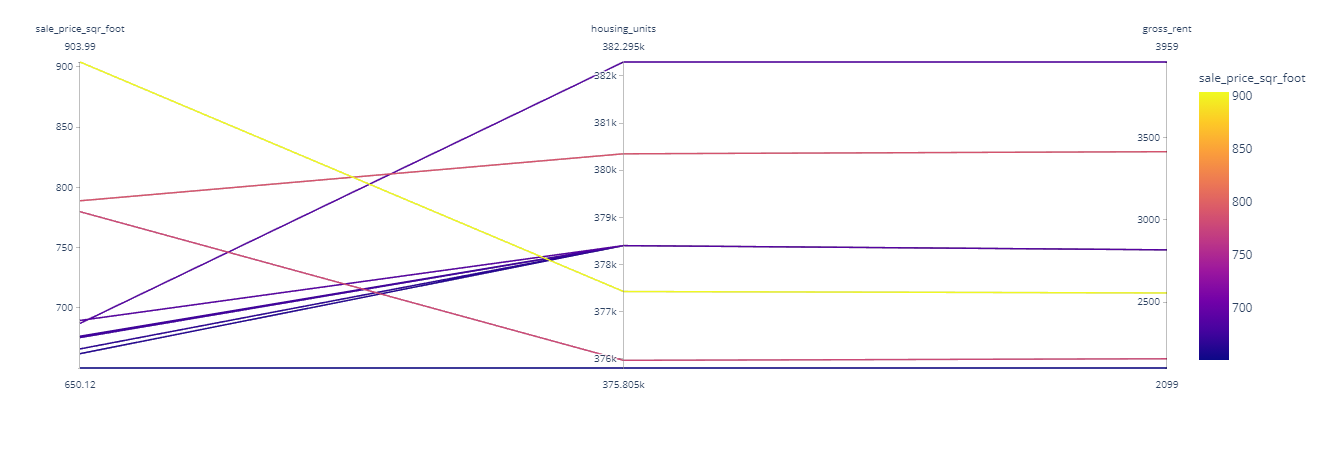

In [115]:
# Parallel Coordinates Plot
# YOUR CODE HERE!
aspn_parallel_coordinates_fig = px.parallel_coordinates(aspn_df, color='sale_price_sqr_foot')
aspn_parallel_coordinates_fig

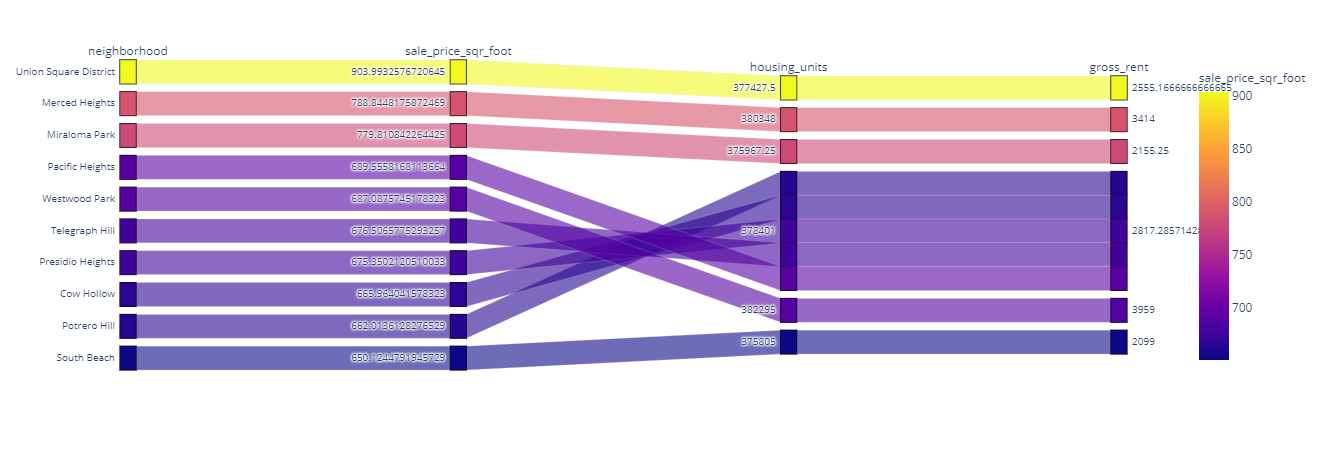

In [116]:
# Parallel Categories Plot
# YOUR CODE HERE!
aspn_parallel_categories_fig = px.parallel_categories(aspn_df, color='sale_price_sqr_foot')
aspn_parallel_categories_fig

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [117]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [118]:
# Calculate the mean values for each neighborhood
# YOUR CODE HERE!
#sfo_data.head()
avg_value_per_neighborhood = sfo_data.groupby('neighborhood').mean()
avpn_df = pd.DataFrame(data=avg_value_per_neighborhood.reset_index()).rename(columns={'neighborhood':'Neighborhood'})
#avpn_df.head()

In [119]:
# Join the average values with the neighborhood locations
# YOUR CODE HERE!
avg_values_locations = pd.merge(df_neighborhood_locations, avpn_df, on='Neighborhood')
#avg_values_locations.head()

### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

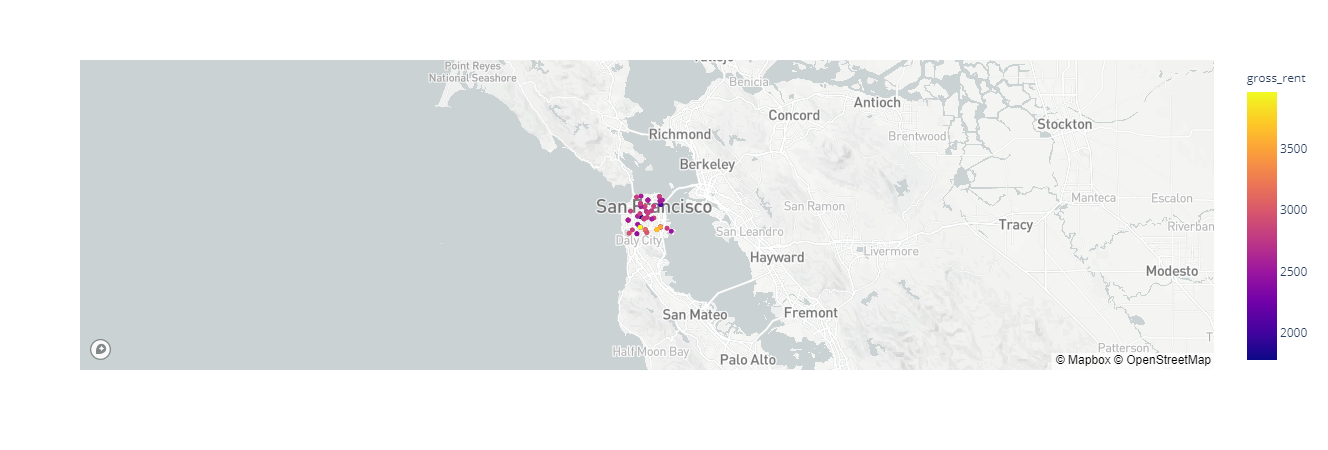

In [120]:
# Create a scatter mapbox to analyze neighborhood info
# YOUR CODE HERE!
map = px.scatter_mapbox(avg_values_locations,
                  lat='Lat',
                  lon='Lon',
                  color='gross_rent'                
)

map.show()